In [4]:
#Se importan la librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
#import quandl
#import pandas_datareader.data as web
import datetime
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pandas.core import datetools

#Lectura del archivo .csv para manipular la data
f = open('predict_stockINTC.csv','rU')
acciones = pd.read_csv(f , parse_dates = True, index_col = 0)  #analiza la columna 0 como fechas
acciones

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1980-03-17,62.50,63.5000,62.5000,62.50,56900.0,0.0,1.0,0.212218,0.215614,0.212218,0.212218,10924800.0
1980-03-18,62.50,63.0000,62.0000,62.00,88900.0,0.0,1.0,0.212218,0.213916,0.210520,0.210520,17068800.0
1980-03-19,63.50,64.5000,63.5000,63.50,96400.0,0.0,1.0,0.215614,0.219009,0.215614,0.215614,18508800.0
1980-03-20,63.50,64.2500,63.2500,63.25,58200.0,0.0,1.0,0.215614,0.218160,0.214765,0.214765,11174400.0
1980-03-21,62.00,62.0000,61.0000,61.00,63400.0,0.0,1.0,0.210520,0.210520,0.207125,0.207125,12172800.0
1980-03-24,60.75,60.7500,59.7500,59.75,46700.0,0.0,1.0,0.206276,0.206276,0.202880,0.202880,8966400.0
1980-03-25,60.00,61.0000,60.0000,60.00,59100.0,0.0,1.0,0.203729,0.207125,0.203729,0.203729,11347200.0
1980-03-26,60.00,60.5000,59.5000,59.50,84700.0,0.0,1.0,0.203729,0.205427,0.202032,0.202032,16262400.0
1980-03-27,58.50,58.5000,57.5000,57.50,140200.0,0.0,1.0,0.198636,0.198636,0.195241,0.195241,26918400.0


In [5]:
acciones.index.sort_values()

DatetimeIndex(['1980-03-17', '1980-03-18', '1980-03-19', '1980-03-20',
               '1980-03-21', '1980-03-24', '1980-03-25', '1980-03-26',
               '1980-03-27', '1980-03-28',
               ...
               '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-17', '2018-09-18', '2018-09-19',
               '2018-09-20', '2018-09-21'],
              dtype='datetime64[ns]', name=u'Date', length=9715, freq=None)

In [6]:
# Convert index to pandas datetime
acciones.index = pd.to_datetime(acciones.index, format="%Y/%m/%d")

In [7]:
acciones_final = acciones.drop(['Open','High','Low','Volume'], axis=1)

In [8]:
# Conver to Series to run Dickey-Fuller test
acciones_final = pd.Series(acciones_final['Close'])

In [9]:
type(acciones_final)

pandas.core.series.Series

In [10]:
def check_stationarity(ts_data):
    
    # Rolling statistics
    roll_mean = ts_data.rolling(30).mean()
    roll_std = ts_data.rolling(5).std()
    
    # Plot rolling statistics
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(ts_data, color='black', label='Original Data')
    plt.plot(roll_mean, color='red', label='Rolling Mean(30 days)')
    plt.legend()
    plt.subplot(212)
    plt.plot(roll_std, color='green', label='Rolling Std Dev(5 days)')
    plt.legend()
    
    # Dickey-Fuller test
    print('Dickey-Fuller test results\n')
    acciones_test = adfuller(ts_data, regresults=False)
    test_result = pd.Series(acciones_test[0:4], index=['Test Statistic','p-value','# of lags','# of obs'])
    print(test_result)
    for k,v in acciones_test[4].items():
        print('Critical value at %s: %1.5f' %(k,v))

Dickey-Fuller test results

Test Statistic      -3.750153
p-value              0.003461
# of lags           38.000000
# of obs          9676.000000
dtype: float64
Critical value at 5%: -2.86184
Critical value at 1%: -3.43103
Critical value at 10%: -2.56693


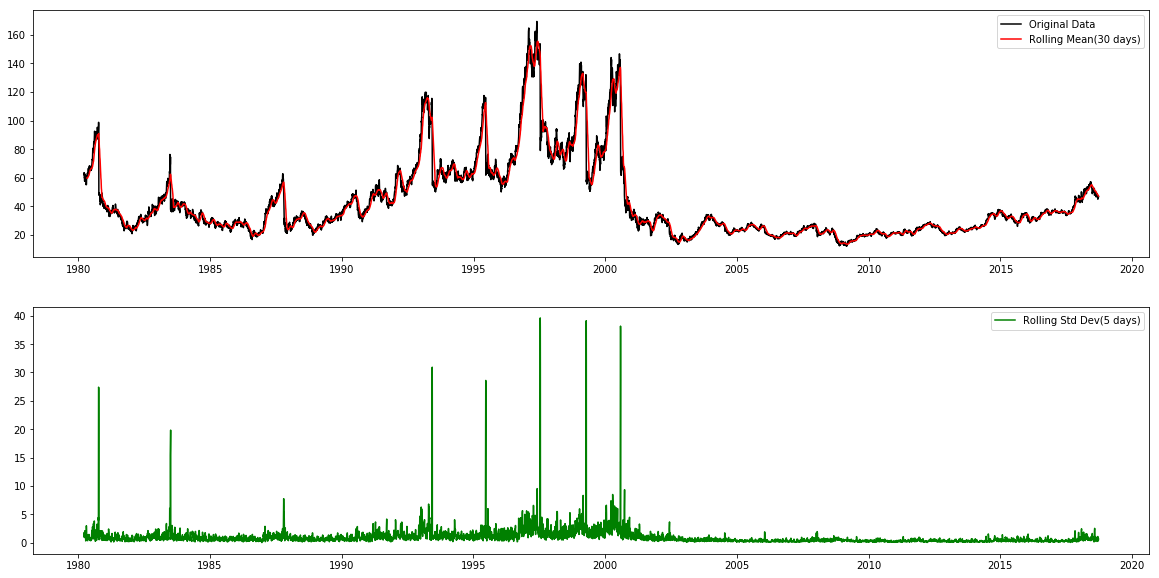

In [11]:
check_stationarity(acciones_final)

In [12]:
#Como la estadística de prueba es mayor que todos los valores críticos, 
#la serie de tiempo claramente no es estacionaria. 
#Se requieren pruebas de transformaciones diferentes para la estacionariedad antes de aplicar el modelo ARIMAa series de tiempo.
# Log transform time series
acciones_final_log = np.log(acciones_final)
acciones_final_log.head()

Date
1980-03-17    4.135167
1980-03-18    4.127134
1980-03-19    4.151040
1980-03-20    4.147095
1980-03-21    4.110874
Name: Close, dtype: float64

Dickey-Fuller test results

Test Statistic      -2.721979
p-value              0.070312
# of lags            7.000000
# of obs          9707.000000
dtype: float64
Critical value at 5%: -2.86184
Critical value at 1%: -3.43102
Critical value at 10%: -2.56693


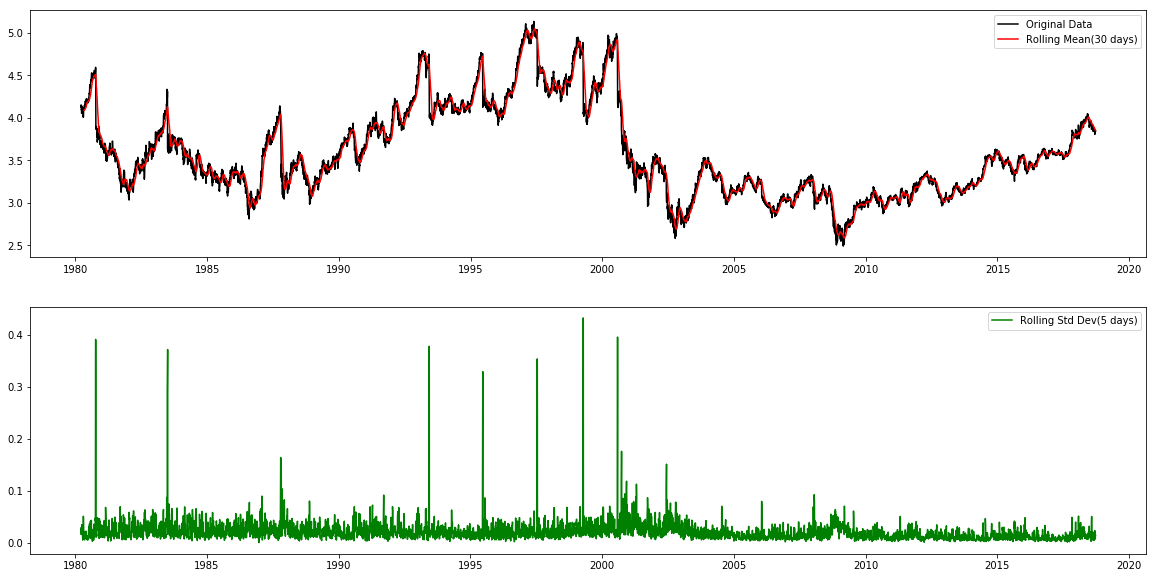

In [13]:
# Check stationarity
acciones_final_log.dropna(inplace=True)
check_stationarity(acciones_final_log)

In [14]:
#La transformación de registro no es estacionaria ya que la estadística de prueba es mayor que los valores críticos 
#y también puede visualizar esto en el primer gráfico
#Log diferenciando transformación de series de tiempo originales
# Log Differencing
acciones_final_log_diff = acciones_final_log - acciones_final_log.shift()

Dickey-Fuller test results

Test Statistic     -39.09675
p-value              0.00000
# of lags            6.00000
# of obs          9707.00000
dtype: float64
Critical value at 5%: -2.86184
Critical value at 1%: -3.43102
Critical value at 10%: -2.56693


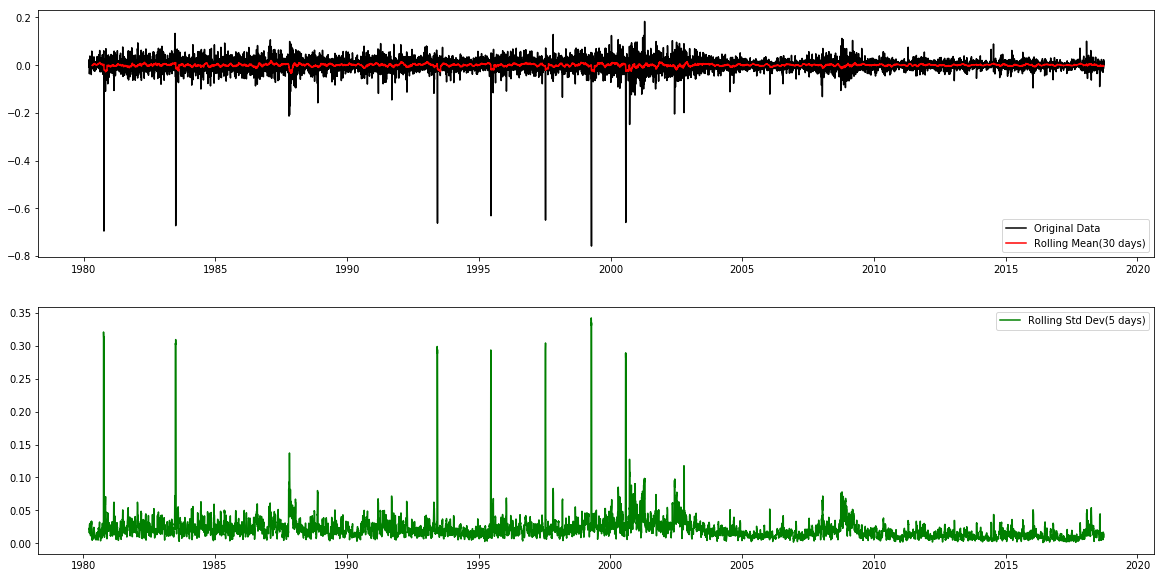

In [15]:
acciones_final_log_diff.dropna(inplace=True)
check_stationarity(acciones_final_log_diff)

In [16]:
#Transformación de diferenciación simple de series de tiempo originales
# Differencing
acciones_final_diff = acciones_final - acciones_final.shift()

Dickey-Fuller test results

Test Statistic   -1.424385e+01
p-value           1.521364e-26
# of lags         3.800000e+01
# of obs          9.675000e+03
dtype: float64
Critical value at 5%: -2.86184
Critical value at 1%: -3.43103
Critical value at 10%: -2.56693


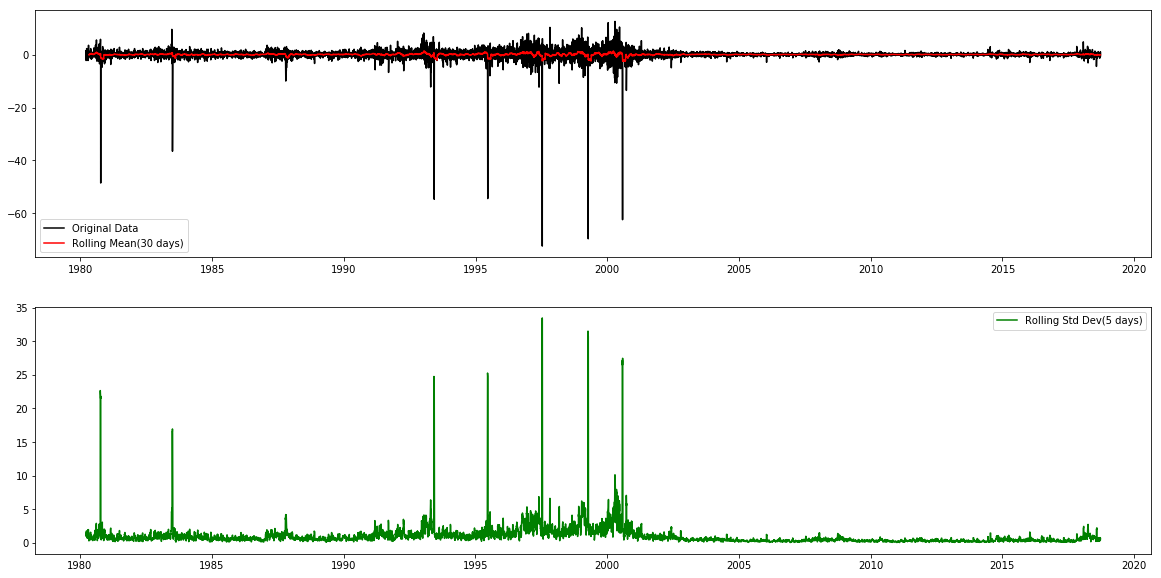

In [17]:
acciones_final_diff.dropna(inplace=True)
check_stationarity(acciones_final_diff)

In [18]:
#Como la diferenciación simple produce una estadística de prueba mucho más baja que los valores críticos, 
#la utilizaremos para aplicar ARIMA
from statsmodels.tsa.stattools import acf, pacf

In [19]:
acciones_acf = acf(acciones_final_diff)

In [20]:
acciones_pacf = pacf(acciones_final_diff)

In [21]:
import statsmodels.api as sm

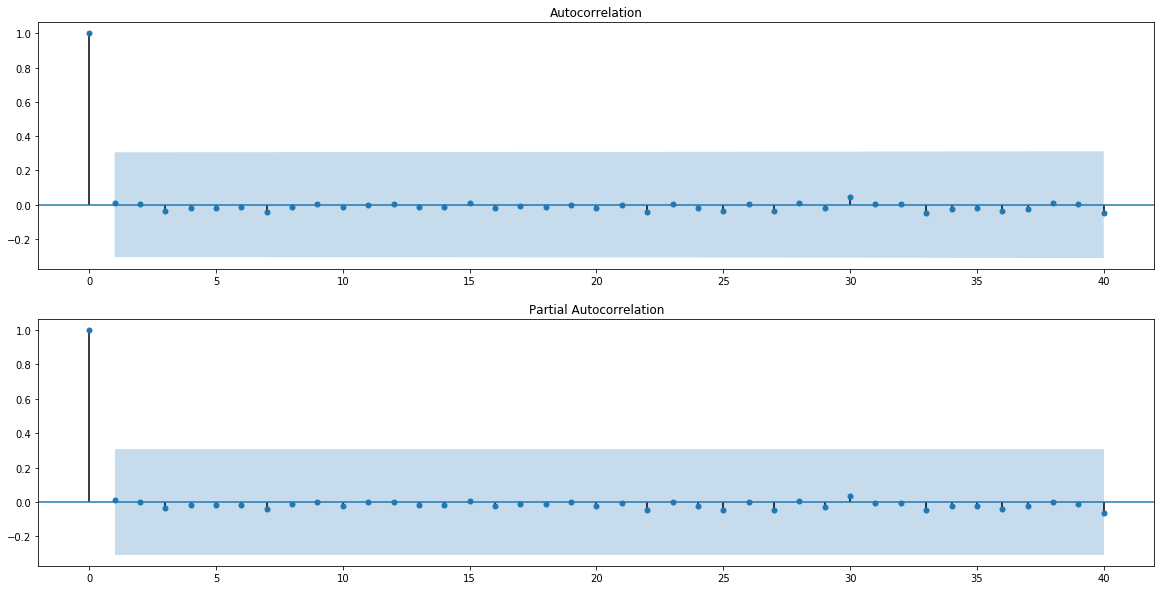

In [22]:
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_subplot(211)
fig1 = sm.graphics.tsa.plot_acf(acciones_acf, ax=ax1)
ax2 = fig1.add_subplot(212)
fig1 = sm.graphics.tsa.plot_pacf(acciones_pacf, ax=ax2)

In [23]:
model = ARIMA(acciones_final_diff, (1,1,0))

In [24]:
fit_model = model.fit(full_output=True)

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [25]:
predictions = model.predict(fit_model.params, start=1760, end=1769)

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [26]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 9713
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -22649.081
Method:                       css-mle   S.D. of innovations              2.491
Date:                Thu, 27 Sep 2018   AIC                          45304.163
Time:                        04:06:42   BIC                          45325.706
Sample:                    03-19-1980   HQIC                         45311.466
                         - 09-21-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.812e-05      0.017     -0.001      0.999      -0.033       0.033
ar.L1.D.Close    -0.4943      0.009    -56.039      0.000      -0.512      -0.477
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0232           +0.0000j            2.0232            0.5000
-----------------------------------------------------------------------------
"""

In [27]:
predictions

array([-9.88553140e-01,  3.70670205e-01,  2.47104447e-01, -2.70707031e-05,
       -4.94290106e-01,  3.70670205e-01, -2.70707031e-05,  2.47104447e-01,
       -8.05675818e-01, -7.36478993e-01])

In [28]:
fit_model.predict(start=1760, end=1769)

Date
1987-03-05   -0.988553
1987-03-06    0.370670
1987-03-09    0.247104
1987-03-10   -0.000027
1987-03-11   -0.494290
1987-03-12    0.370670
1987-03-13   -0.000027
1987-03-16    0.247104
1987-03-17   -0.805676
1987-03-18   -0.736479
dtype: float64

In [29]:
#Es hora de volver a transformar los datos a la escala original
pred_model_diff = pd.Series(fit_model.fittedvalues, copy=True)
pred_model_diff.head()

Date
1980-03-19   -0.000018
1980-03-20   -0.988553
1980-03-21    0.864933
1980-03-24    0.988499
1980-03-25   -0.494290
dtype: float64

In [30]:
# Calculate cummulative sum of the fitted values (cummulative sum of differences)
pred_model_diff_cumsum = pred_model_diff.cumsum()
pred_model_diff_cumsum.head()

Date
1980-03-19   -0.000018
1980-03-20   -0.988571
1980-03-21   -0.123638
1980-03-24    0.864861
1980-03-25    0.370571
dtype: float64

In [31]:
# Element-wise addition back to original time series
acciones_final_trans = acciones_final.add(pred_model_diff_cumsum, fill_value=0)
# Last 5 rows of fitted values
acciones_final_trans.tail()

Date
2018-09-17    44.924876
2018-09-18    45.649332
2018-09-19    45.303895
2018-09-20    46.665254
2018-09-21    45.630964
dtype: float64

In [32]:
# Last 5 rows of original time series
acciones_final.tail()

Date
2018-09-17    45.42
2018-09-18    46.10
2018-09-19    46.15
2018-09-20    47.20
2018-09-21    46.66
Name: Close, dtype: float64

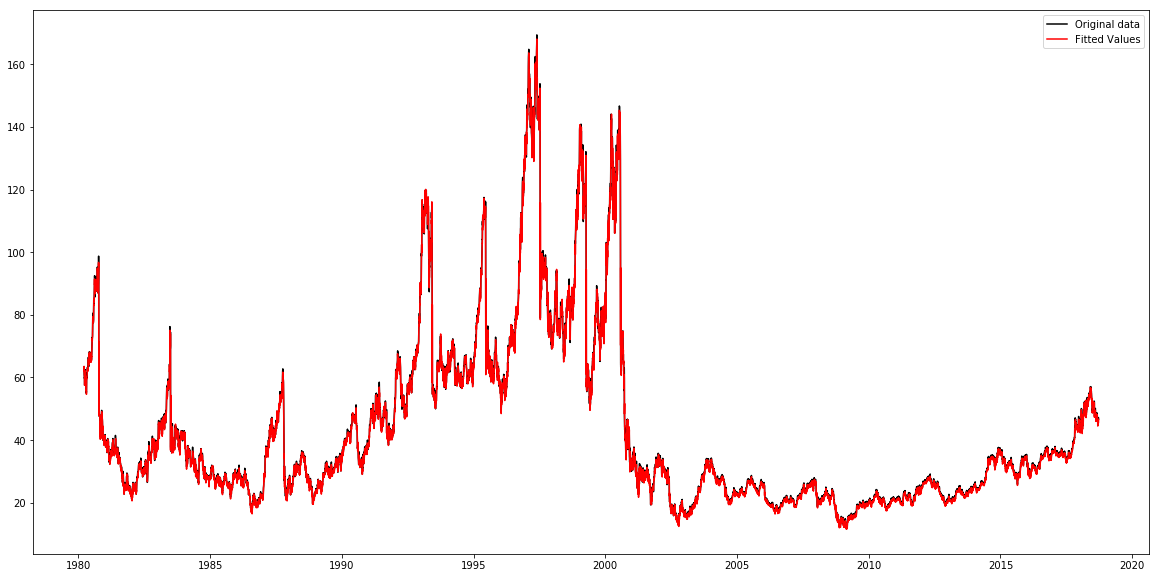

In [33]:
# Plot of orignal data and fitted values
plt.figure(figsize=(20,10))
plt.plot(acciones_final, color='black', label='Original data')
plt.plot(acciones_final_trans, color='red', label='Fitted Values')
plt.legend()

In [34]:
x = acciones_final.values
y = acciones_final_trans.values

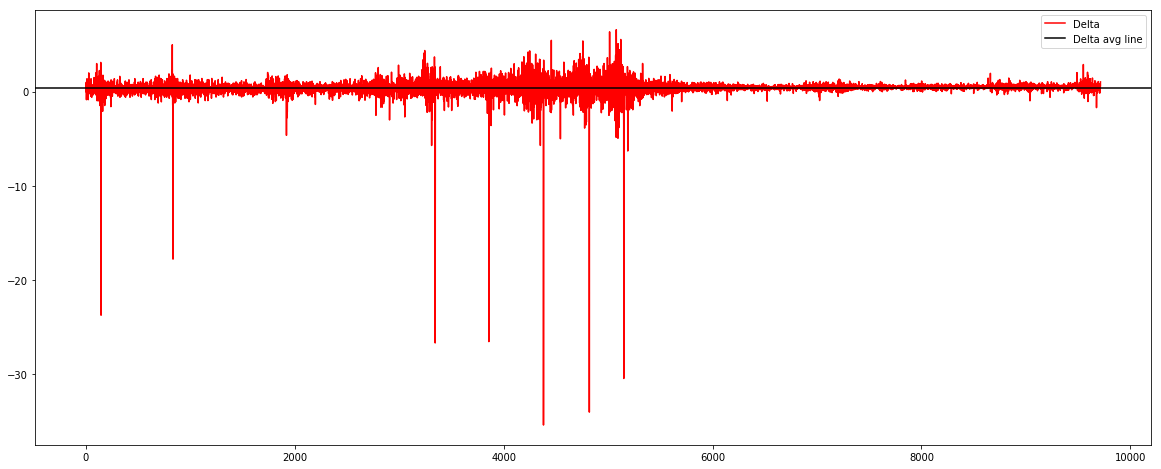

In [35]:
# Trend of error
plt.figure(figsize=(20,8))
plt.plot((x - y), color='red', label='Delta')
plt.axhline((x-y).mean(), color='black', label='Delta avg line')
plt.legend()

In [ ]:
#El error promedio parece ser de alrededor de $  por acción

In [36]:
#El último paso es crear una serie con diez valores de predicción
final_pred = []
for i in predictions:
    t = acciones_final[-1] + i
    final_pred.append(t)

In [37]:
final_pred = pd.Series(final_pred)
final_pred

0    45.671447
1    47.030670
2    46.907104
3    46.659973
4    46.165710
5    47.030670
6    46.659973
7    46.907104
8    45.854324
9    45.923521
dtype: float64